## Assignment 1 - Logistic Regression with NumPy and PyTorch 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rmenegaux/Intro-to-Neural-Nets-AIMS-2025/blob/main/assignment1_logistic_regression.ipynb)


### Binary Classification with Logistic Regression

Logistic regression is a linear classification algorithm that predicts the probability of a binary outcome. Given an input feature vector **x**, the model computes:

$$
z = w^T x
$$

where $w$ is the weight vector. The bias term $b$ has been omitted for simplicity, but can be accounted for by concatenating a 1 to $x$.

Instead of using this value directly for classification, we apply the **sigmoid function**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This maps the output to a probability between 0 and 1: 
$$\sigma(z) = \mathbb{P}[y=1 | x]$$
The predicted class can then be determined by thresholding:
$$
\hat{y} =
\begin{cases}
1, & \text{if } \sigma(z) \geq 0.5 \\
0, & \text{otherwise}
\end{cases}
$$

To train the model, we minimize the **binary cross-entropy loss**:

$$
L = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right)
$$

where **y** is the true label and **ŷ** is the predicted probability.

Gradient descent is used to update **w** and **b** iteratively to minimize this loss.


### Question 1: Computing the gradients
Proceeding step by step:

- Compute the derivative of $z \to \log \sigma(z)$
- Compute the gradient w.r.t $w$ of $z(w) = w^T x$
- Using the chain rule, deduce the gradient of $w \to \log \sigma(z(w))$
- Deduce the gradient of $L$ w.r.t. $w$: $\nabla_w L$

### Question 2: Plot the sigmoid function

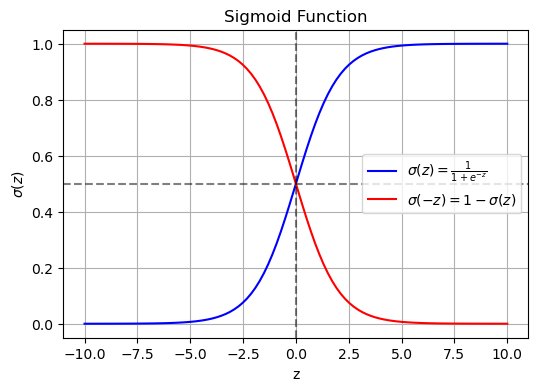

In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate input values
z = np.linspace(-10, 10, 100)
complementary_sigmoid = sigmoid(-z)

# Plot sigmoid function
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid(z), label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='b')
plt.plot(z, sigmoid(-z), label=r'$\sigma(-z) = 1 - \sigma(z)$', color='r')

plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()

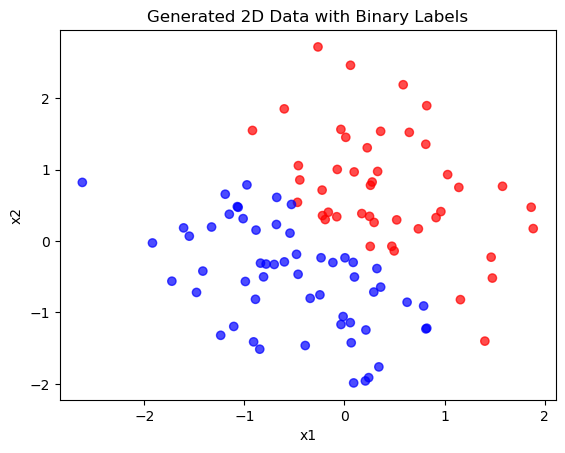

In [7]:
# Generate synthetic 2D classification data
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary classification

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Generated 2D Data with Binary Labels")
plt.show()

### Question 3: Gradient descent
(a) Code the binary cross-entropy loss

(b) Complete the 3 main methods of the `LogisticRegression` class:
- `predict(X)` computes predicted probabilities using the sigmoid function.
- `compute_gradients(X, y)` computes the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.
- `fit(X, y)` updates `self.w` with gradient descent to fit data `X` and `y`


In [8]:
def bce_loss(y_hat, y):
    '''
    Returns the binary cross-entropy (BCE) loss for predicted probabilities `y_hat` in [0,1]
    and ground-truth binary labels `y`
    '''
    return - np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [9]:
class LogisticRegression:
    """
    A simple logistic regression model using gradient descent.

    Attributes:
        w (np.ndarray): Model weights (parameters).

    Methods:
        predict(X): Computes the predicted probabilities using the sigmoid function.
        compute_gradients(X, y): Compute the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.
        
    """

    def __init__(self, input_dim):
        """
        Initializes the logistic regression model with random weights.

        Args:
            input_dim (int): Number of input features (dimensions of X).
        """
        self.w = np.random.randn(input_dim)
    
    def predict(self, X):
        """
        Computes the predicted probabilities using the sigmoid function.

        Args:
            X (np.ndarray): Input feature matrix of shape (num_samples, num_features).

        Returns:
            np.ndarray: Predicted probabilities in range [0,1], of shape (num_samples,).
        """
        return sigmoid(X @ self.w)
    
    def __call__(self, X):
        return self.predict(X)

    def compute_gradients(self, X, y):
        '''
        Compute the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.

        Arguments:
        x -- Input features, shape (N, d), where N is the number of samples and d is the number of features.
        y -- Binary labels (0 or 1), shape (N,).

        Returns:
        grad_w -- Gradient of the BCE loss with respect to self.w, shape (d,).
        '''
        y_hat = self.predict(X)
        grad_w = np.mean((y_hat - y)[:, None] * X, axis=0)
        return grad_w

    def fit(self, X, y, num_epochs=100, learning_rate=0.1):
        """
        Trains the logistic regression model using gradient descent.

        Args:
            X (np.ndarray): Input feature matrix of shape (num_samples, num_features).
            y (np.ndarray): Binary target labels of shape (num_samples,).
            num_epochs (int): Number of training iterations (default: 100).
            learning_rate (float): Step size for gradient updates (default: 0.1).
        """
        for epoch in range(num_epochs):
            # Compute the gradient of the loss function with respect to weights
            grad_w = self.compute_gradients(X, y)

            # Update weights using gradient descent
            self.w -= learning_rate * grad_w

            # Print loss every 10 epochs
            if epoch % (num_epochs // 10) == 0:
                y_hat = self.predict(X)
                loss = bce_loss(y_hat, y)
                print(f'Epoch {epoch}: Loss={loss:.3f}')
            

Epoch 0: Loss=0.425
Epoch 10: Loss=0.245
Epoch 20: Loss=0.197
Epoch 30: Loss=0.172
Epoch 40: Loss=0.156
Epoch 50: Loss=0.144
Epoch 60: Loss=0.136
Epoch 70: Loss=0.128
Epoch 80: Loss=0.123
Epoch 90: Loss=0.118


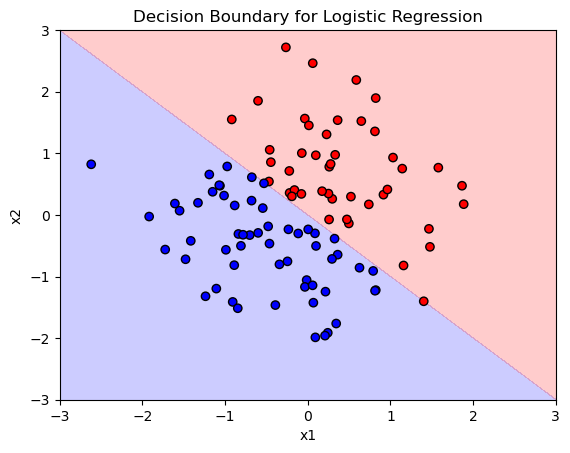

In [10]:
# Create a Logistic Regression model
model = LogisticRegression(input_dim=2)
# Fit the model to the data
model.fit(X, y, learning_rate=1., num_epochs=100)
# Plot the results
def plot_decision_boundary(model, X, y):
    '''
    Plots the decision function of model

    model(X) should output probabilities y_hat
    '''
    xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Convert grid to tensor if model is a PyTorch model
    if isinstance(X, torch.Tensor):
        grid_tensor = torch.tensor(grid, dtype=torch.float32)
        z = model(grid_tensor).detach().numpy()  # Ensure NumPy output
    else:
        z = model(grid)  # Assume NumPy model outputs NumPy array

    z = z.reshape(xx.shape)

    plt.contourf(xx, yy, z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
    plt.scatter(np.array(X[:, 0]), np.array(X[:, 1]), c=np.array(y), cmap='bwr', edgecolor='k')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision Boundary for Logistic Regression")
    plt.show()

plot_decision_boundary(model, X, y)

### Question 4 - Pytorch
---

Implement Logistic Regression for binary classification, using the `pytorch` library

Epoch 0: Loss=0.936
Epoch 10: Loss=0.274
Epoch 20: Loss=0.208
Epoch 30: Loss=0.178
Epoch 40: Loss=0.160
Epoch 50: Loss=0.147
Epoch 60: Loss=0.138
Epoch 70: Loss=0.130
Epoch 80: Loss=0.124
Epoch 90: Loss=0.119


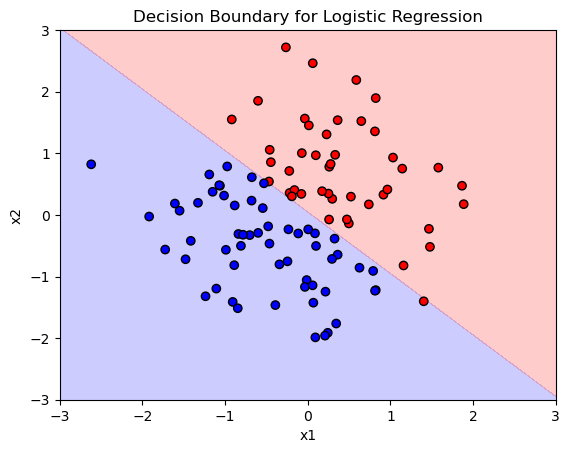

In [11]:
import torch
import torch.nn as nn

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define logistic regression model
class LogisticRegression_pytorch(nn.Module):
    '''
    Logistic Regression model, for binary classification.

    Combination of a Linear layer and a sigmoid activation
    '''
    def __init__(self, input_dim):
        super(LogisticRegression_pytorch, self).__init__()

        self.layers = nn.ModuleList([
            nn.Linear(input_dim, 1),
            nn.Sigmoid()
            ])
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Initialize model, loss function, and optimizer
model = LogisticRegression_pytorch(input_dim=2)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1.)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Reset gradients
    optimizer.zero_grad()
    # Forward pass
    y_hat = model(X_tensor)
    # Compute the loss
    loss = criterion(y_hat, y_tensor)
    # Compute the gradients in the backward pass
    loss.backward()
    # Update the model parameters
    optimizer.step()
    
    if epoch % (num_epochs // 10) == 0:
        print(f"Epoch {epoch}: Loss={loss.item():.3f}")

plot_decision_boundary(model, X_tensor, y_tensor)

### Question 5 (bonus) - Real-world testcase
---

Test either one of the logistic regressions you implemented on the **Breast Cancer Wisconsin dataset** from `sklearn.datasets`. 

It is a binary classification dataset (malignant vs. benign tumors) with real medical features.


**Report the final test accuracy.**

You can change the learning rate or number of epochs to check the influence.

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Standardize features for better optimization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your logistic regression model on the training data X_train
model = LogisticRegression(input_dim=X_train.shape[1])
model.fit(X_train, y_train, num_epochs=1000, learning_rate=0.01)

# Evaluate on the test set
y_pred = model.predict(X_test) > 0.5  # Convert probabilities to binary predictions
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.1%}")


Epoch 0: Loss=3.999
Epoch 100: Loss=0.975
Epoch 200: Loss=0.587
Epoch 300: Loss=0.455
Epoch 400: Loss=0.370
Epoch 500: Loss=0.310
Epoch 600: Loss=0.268
Epoch 700: Loss=0.237
Epoch 800: Loss=0.214
Epoch 900: Loss=0.196
Test Accuracy: 94.7%
